# Assignment 1


In [28]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# Example from lecture 2

A simple simulation of a pendulum using forward euler.

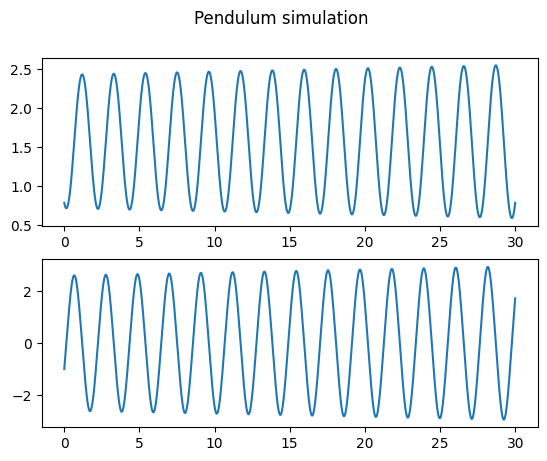

In [51]:
# Parameters
g, m, r, theta, omega = symbols('g m r theta omega')

g = 9.81
m = 1
r = 1

sim_time = 30
dt = 0.001
num_steps = int(sim_time/dt)

theta_simulated = np.zeros(num_steps)
omega_simulated = np.zeros(num_steps)
time_steps = np.zeros(num_steps)

# Initial values
theta_simulated[0] = np.pi/4
omega_simulated[0] = -1

for i in range(num_steps-1):
    dtheta = omega_simulated[i]
    domega = (g*np.cos(theta_simulated[i])/r)

    # Euler's forward method
    theta_simulated[i+1] = theta_simulated[i] + dtheta*dt
    omega_simulated[i+1] = omega_simulated[i] + domega*dt
    time_steps[i+1] = time_steps[i] + dt
    
plt.figure()
plt.subplot(211)
plt.plot(time_steps, theta_simulated)
plt.subplot(212)
plt.plot(time_steps, omega_simulated)
plt.suptitle('Pendulum simulation')
plt.show()

In [52]:
from sympy import symbols, Function, Derivative
from sympy.physics.mechanics import *
import math
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
![Cart](cart_msd.png)


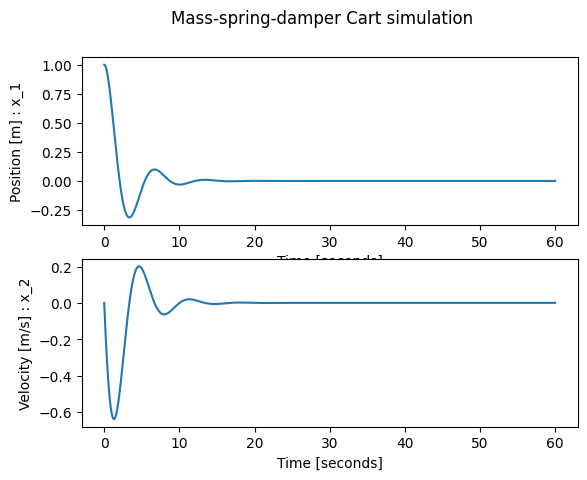

In [53]:
x = dynamicsymbols('x') # Position of the cart, time dependent

m = symbols('m') # Mass of cart
k, d = symbols('k d') # Spring constant and damper constant
t = symbols('t') # Time

m = 1 #kg
k = 1 #N/m
d = 0.7 #Ns/m
x1_init = 1 #m away from equilibrium

# Adjusting the lecture 2 example

sim_time = 60
dt = 0.01
num_steps = math.ceil(sim_time/dt)

time_steps = np.zeros(num_steps)
x_simulated = np.zeros((2, num_steps))

# Initial conditions
x_simulated[0,0] = x1_init

#Simulation
for i in range(num_steps-1):
    x1_dot = x_simulated[1][i]
    x2_dot = (-(d/m)*x_simulated[1][i] - (k/m)*x_simulated[0][i])

    x_simulated[0][i+1] = x_simulated[0][i] + x1_dot*dt
    x_simulated[1][i+1] = x_simulated[1][i] + x2_dot*dt
    time_steps[i+1] = time_steps[i] + dt

plt.figure()
plt.subplot(211)
plt.xlabel("Time [seconds]")
plt.ylabel("Position [m] : x_1")
plt.plot(time_steps, x_simulated[0])
plt.subplot(212)
plt.xlabel("Time [seconds]")
plt.ylabel("Velocity [m/s] : x_2")
plt.plot(time_steps, x_simulated[1])
plt.suptitle('Mass-spring-damper Cart simulation')
plt.show()


# Problem 1d)

We now modify the model by introducing a force in the time period [15, 40].


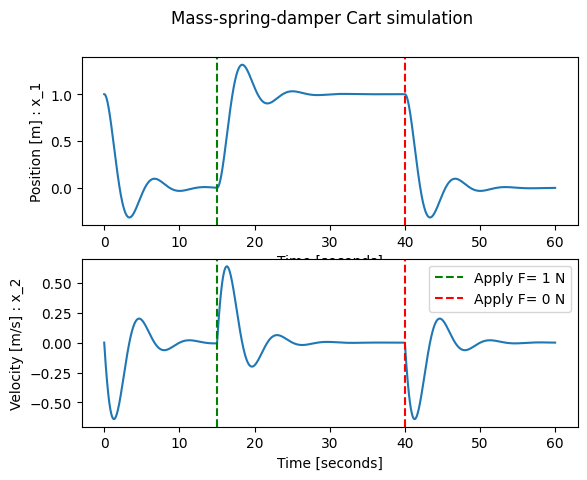

In [54]:
sim_time = 60
dt = 0.01
num_steps = math.ceil(sim_time/dt)

time_steps = np.zeros(num_steps)
x_simulated = np.zeros((2, num_steps))

force_start_time = 15
force_stop_time = 40
force = 1 #Nm
# Initial conditions
x_simulated[0,0] = x1_init

#Simulation
for i in range(num_steps-1):
    x1_dot = x_simulated[1][i]
    x2_dot = (-(d/m)*x_simulated[1][i] - (k/m)*x_simulated[0][i])

    if ((time_steps[i]) >= force_start_time) and ((time_steps[i]) <= force_stop_time):
        x2_dot += force/m
    
    x_simulated[0][i+1] = x_simulated[0][i] + x1_dot*dt
    x_simulated[1][i+1] = x_simulated[1][i] + x2_dot*dt
    time_steps[i+1] = time_steps[i] + dt

plt.figure()
plt.subplot(211)
plt.xlabel("Time [seconds]")
plt.ylabel("Position [m] : x_1")
plt.plot(time_steps, x_simulated[0])
plt.axvline(force_start_time, color='g', linestyle='--', label=f'Apply F= {force} N')
plt.axvline(force_stop_time, color='r', linestyle='--', label=f'Apply F= {0} N')
plt.subplot(212)
plt.xlabel("Time [seconds]")
plt.ylabel("Velocity [m/s] : x_2")
plt.plot(time_steps, x_simulated[1])
plt.axvline(force_start_time, color='g', linestyle='--', label=f'Apply F= {force} N')
plt.axvline(force_stop_time, color='r', linestyle='--', label=f'Apply F= {0} N')
plt.suptitle('Mass-spring-damper Cart simulation')
plt.legend(loc='best')
plt.show()

# Sources

Dynamics with python, J. K. Moore, (https://www.moorepants.info/blog/npendulum.html)